In [4]:
# 分类
from sklearn.neighbors import KNeighborsClassifier
# 回归
from sklearn.neighbors import KNeighborsRegressor

KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)

# - n_neighbors: 临近点个数：K值。K小，会过拟合。K大，会欠拟合。
# - weights: 代表邻居的权重，uniform: 统一权重（所有邻居权重相同），distance: 距离权重。代表权重是距离的倒数，即与距离成反比。
# - algorithm: 近邻算法，auto: 自动选择（根据数据的情况自动选择合适的算法），ball_tree: 用于高维数据（球树，与KDtree一样都是多维空间的数据结果，更适用于维度大的情况），kd_tree: 用于低维数据（<20），brute: 暴力搜索，采用线性扫描而不是构造树结构进行快速检索，计算量大。
# - leaf_size: 代表构造树的叶子节点数，越小越好，但是小于30时，构造树的时间和搜索时间都会变慢。

# - metric_params={'p': 1}
# - p: 代表距离度量的指数，1: 曼哈顿距离，2: 欧式距离，其他: 明可夫斯基距离。

KNeighborsClassifier(n_jobs=1)

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


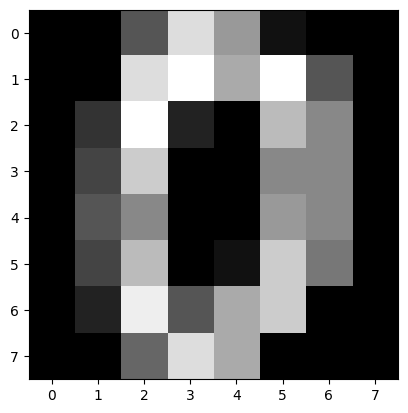

In [1]:
# 如何用KNN对手写数字进行识别分类

# 加载数
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
data = digits.data
target = digits.target

# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()


In [2]:
# 分割数据，将25%的数据作为测试集，其余作为训练集
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25, random_state=33) # random_state: 随机数种子，保证每次随机分割的结果都一样

# 采用Z-Score规范化
ss = StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

# Z-score: 将数据转换为标准正态分布，即均值为0，标准差为1的正态分布。
# Z-score标准化方法适用于属性A的最大值和最小值未知的情况，或有超出取值范围的离群数据的情况。
# Z-score标准化方法要求原始数据的分布可以近似为高斯分布，否则效果会变差。


[ 0.00000000e+00 -3.26723140e-01 -8.75547113e-01  5.15429155e-01
 -2.02767578e-01 -1.01854560e+00 -4.16870153e-01 -1.28445208e-01
 -6.30488325e-02 -6.20016361e-01 -2.43754230e-01  7.50084614e-01
 -1.76332093e+00 -1.36304030e+00  5.63871245e-01 -1.38837739e-01
 -5.15600932e-02 -1.73546020e-01  1.08113330e+00 -1.58796824e-01
 -1.15489364e+00 -1.25917647e-01  4.24696964e+00  4.40806560e+00
 -3.85614944e-02  1.73466608e+00  1.11511355e+00 -4.69981158e-01
 -6.29056628e-01  1.41979885e+00  2.54007235e+00 -4.72455591e-02
  0.00000000e+00  7.19570322e-01  1.31912348e+00  1.11138665e+00
  9.64484118e-01  1.04716621e+00 -2.71053713e-03  0.00000000e+00
 -7.08978629e-02 -5.32239088e-01 -9.10195142e-01 -5.11791113e-01
  1.32867334e+00 -3.31959081e-02 -7.98799181e-01 -8.22120443e-02
 -4.09347820e-02 -4.02862116e-01 -1.33103689e+00 -1.08678943e-01
  1.21393727e+00 -1.25990174e+00 -7.46600463e-01 -2.05957126e-01
 -2.72569633e-02 -2.91387122e-01 -1.08064753e+00  6.74063507e-01
  8.51068634e-01 -1.11540

In [5]:
# 创建KNN分类器
knn = KNeighborsClassifier()
knn.fit(train_ss_x, train_y)
predict_y = knn.predict(test_ss_x)
print('KNN准确率: %0.4lf' % knn.score(test_ss_x, test_y))

KNN准确率: 0.9756


In [ ]:
# SVM
svm = SVC()

# 多项式朴素贝叶斯
mnb = MultinomialNB()
# 不能有负值
# Min-Max规范化 [0,1]
mm = MinMaxScaler()

# 决策树
dtc = DecisionTreeClassifier()
mm = MinMaxScaler()



In [ ]:
# -*- coding: utf-8 -*-
# 手写数字分类
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# 加载数据
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()

# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

# 创建KNN分类器
knn = KNeighborsClassifier()
knn.fit(train_ss_x, train_y) 
predict_y = knn.predict(test_ss_x) 
print("KNN准确率: %.4lf" % accuracy_score(test_y, predict_y))

# 创建SVM分类器
svm = SVC()
svm.fit(train_ss_x, train_y)
predict_y=svm.predict(test_ss_x)
print('SVM准确率: %0.4lf' % accuracy_score(test_y, predict_y))

# 采用Min-Max规范化
mm = preprocessing.MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.transform(test_x)

# 创建Naive Bayes分类器
mnb = MultinomialNB()
mnb.fit(train_mm_x, train_y) 
predict_y = mnb.predict(test_mm_x) 
print("多项式朴素贝叶斯准确率: %.4lf" % accuracy_score(test_y, predict_y))

# 创建CART决策树分类器
dtc = DecisionTreeClassifier()
dtc.fit(train_mm_x, train_y) 
predict_y = dtc.predict(test_mm_x) 
print("CART决策树准确率: %.4lf" % accuracy_score(test_y, predict_y))